# Working with index

## Content
* [Index types](#Index-types)
* [Indexing of SEGY file](#Indexing-of-SEGY-file)
* [Merging indices](#Model-architecture)
* [Indexing of multiple SEGY files](#Indexing-of-multiple-SEGY-files)
* [Indexing of SPS files](#Indexing-of-SPS-files)
* [Indexing of grid bins](#Indexing-of-grid-bins)

## Index types

There are 4 types of indices:
* ```FieldIndex``` enumerates field records
* ```SegyFilesIndex``` enumerates SEGY files
* ```TraceIndex``` enumerates traces
* ```BinsIndex``` enumerated bins of regular grid.

Each index contains basic SEGY trace headers: ```FieldRecord```, ```TraceNumber``` and ```TRACE_SEQUENCE_FILE```. Addinional headers depend on index type and on requisted extra headers.

There is an easy convertion between index types. Let ```index``` be an instance of some intex type, then  ```FieldIndex(index)``` will be an instance of type ```FieldIndex```, ```TraceIndex(index)``` will be an instance of type ```TraceIndex``` etc.

Index can be created from a single SEGY file, from multiple SEGY files, from SPS files and merged together. Below we illustrate these options. 

## Indexing of SEGY file

Let's create an index of field records from a signle segy file. Note that we requiest extra header ```offsets```  to be added to index. ```index.head()``` shows first 5 traces indexed.

In [19]:
import sys
import pandas as pd
import numpy as np

sys.path.append('..')
from geolog import FieldIndex, TraceIndex, SegyFilesIndex, BinsIndex, SeismicBatch
from batchflow import Dataset

path_raw = '/notebooks/egor/noise_data/DN02A_LIFT_AMPSCAL.sgy'

index_raw = FieldIndex(name='raw', extra_headers=['offset'], path=path_raw)
index_raw.head()

,file_id,TraceNumber,offset,TRACE_SEQUENCE_FILE
,raw,,,raw
FieldRecord,,,,
111906,/notebooks/egor/noise_data/DN02A_LIFT_AMPSCAL.sgy,1656,35,1
111906,/notebooks/egor/noise_data/DN02A_LIFT_AMPSCAL.sgy,1657,36,2
111906,/notebooks/egor/noise_data/DN02A_LIFT_AMPSCAL.sgy,1655,78,3
111906,/notebooks/egor/noise_data/DN02A_LIFT_AMPSCAL.sgy,1658,79,4
111906,/notebooks/egor/noise_data/DN02A_LIFT_AMPSCAL.sgy,1654,127,5


Convert to ```TraceIndex``` to iterate over traces:

In [20]:
TraceIndex(index_raw).head()

,FieldRecord,file_id,TraceNumber,offset,TRACE_SEQUENCE_FILE
,,raw,,,raw
0,111906,/notebooks/egor/noise_data/DN02A_LIFT_AMPSCAL.sgy,1656,35,1
1,111906,/notebooks/egor/noise_data/DN02A_LIFT_AMPSCAL.sgy,1657,36,2
2,111906,/notebooks/egor/noise_data/DN02A_LIFT_AMPSCAL.sgy,1655,78,3
3,111906,/notebooks/egor/noise_data/DN02A_LIFT_AMPSCAL.sgy,1658,79,4
4,111906,/notebooks/egor/noise_data/DN02A_LIFT_AMPSCAL.sgy,1654,127,5


Convert to ```SegyFilesIndex``` to iterate over SEGY files:

In [21]:
SegyFilesIndex(index_raw, name='raw').head()

,FieldRecord,TraceNumber,offset,TRACE_SEQUENCE_FILE
,,,,raw
"(file_id, raw)",,,,
/notebooks/egor/noise_data/DN02A_LIFT_AMPSCAL.sgy,111906,1656,35,1
/notebooks/egor/noise_data/DN02A_LIFT_AMPSCAL.sgy,111906,1657,36,2
/notebooks/egor/noise_data/DN02A_LIFT_AMPSCAL.sgy,111906,1655,78,3
/notebooks/egor/noise_data/DN02A_LIFT_AMPSCAL.sgy,111906,1658,79,4
/notebooks/egor/noise_data/DN02A_LIFT_AMPSCAL.sgy,111906,1654,127,5


## Merging indices

Two index instances can be merged on common headers. Below we create an index of a second file and merge it with ```index_raw```:

In [10]:
path_lift = '/notebooks/egor/noise_data/DN02B_SHOTS_LIFT1.sgy'

index_lift = FieldIndex(name='lift', path=path_lift)
index_raw.merge(index_lift).head()

,file_id,TraceNumber,offset,TRACE_SEQUENCE_FILE,file_id,TRACE_SEQUENCE_FILE
,raw,,,raw,lift,lift
FieldRecord,,,,,,
111906,/notebooks/egor/noise_data/DN02A_LIFT_AMPSCAL.sgy,1656,35,1,/notebooks/egor/noise_data/DN02B_SHOTS_LIFT1.sgy,1
111906,/notebooks/egor/noise_data/DN02A_LIFT_AMPSCAL.sgy,1657,36,2,/notebooks/egor/noise_data/DN02B_SHOTS_LIFT1.sgy,2
111906,/notebooks/egor/noise_data/DN02A_LIFT_AMPSCAL.sgy,1655,78,3,/notebooks/egor/noise_data/DN02B_SHOTS_LIFT1.sgy,3
111906,/notebooks/egor/noise_data/DN02A_LIFT_AMPSCAL.sgy,1658,79,4,/notebooks/egor/noise_data/DN02B_SHOTS_LIFT1.sgy,4
111906,/notebooks/egor/noise_data/DN02A_LIFT_AMPSCAL.sgy,1654,127,5,/notebooks/egor/noise_data/DN02B_SHOTS_LIFT1.sgy,5


Now we can iterate over field records and load corresponding traces from both files.

In [11]:
batch = (Dataset(index_raw, SeismicBatch).next_batch(1)
         .load(components=('raw', 'lift'), sort_by='offset'))

Show ```'raw'``` traces related to the first field record:

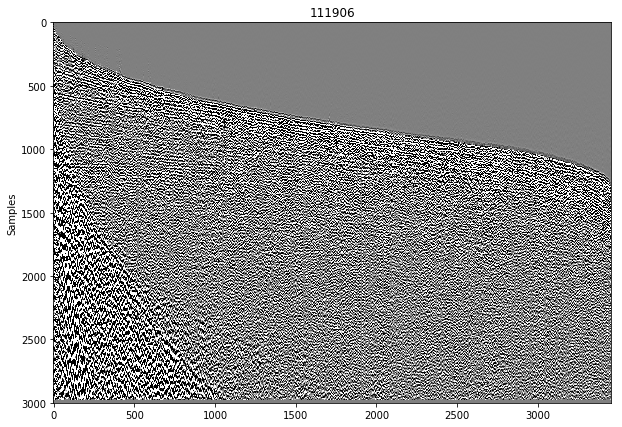

In [12]:
cv = 0.1
batch.show_traces('raw', batch.indices[0], figsize=(10, 7),
                  vmin=-cv, vmax=cv, cmap='gray')

Show ```'lift'``` traces related to the first field record:

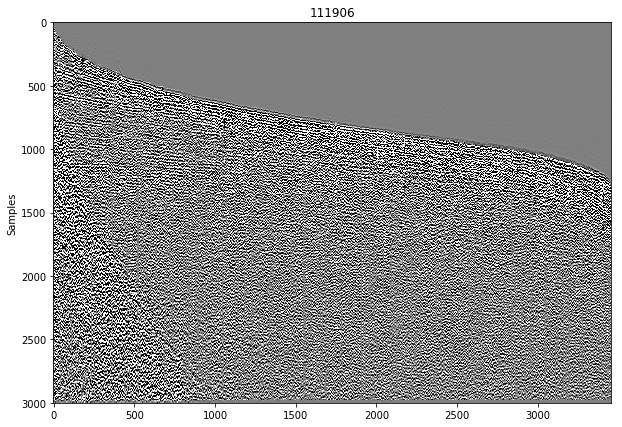

In [14]:
batch.show_traces('lift', batch.indices[0], figsize=(10, 7),
                  vmin=-cv, vmax=cv, cmap='gray')

## Indexing of multiple SEGY files

One can index many SEGY files at once. Additional parameter ```drop_duplicates``` removes any ancillary traces from index:

In [30]:
path_segy = '/notebooks/egor/2D_Valyton/prof_37/segy/*.sgy'

index_segy = FieldIndex(name='raw', path=path_segy, drop_duplicates=True)
index_segy.head()

,file_id,TraceNumber,TRACE_SEQUENCE_FILE
,raw,,raw
FieldRecord,,,
354,/notebooks/egor/2D_Valyton/prof_37/segy/000003...,1,3
354,/notebooks/egor/2D_Valyton/prof_37/segy/000003...,2,4
354,/notebooks/egor/2D_Valyton/prof_37/segy/000003...,3,5
354,/notebooks/egor/2D_Valyton/prof_37/segy/000003...,4,6
354,/notebooks/egor/2D_Valyton/prof_37/segy/000003...,5,7


Note that ```index_segy``` does not include the```offset``` header. In fact, this header is not filled is SEGY files. However, in the next section we will create an index on a basis of SPS files  that always includes ```offset``` values and merge it with ```index_segy```. At the moment we can only sort traces by ```TraceNumber``` or ```TRACE_SEQUENCE_FILE```:

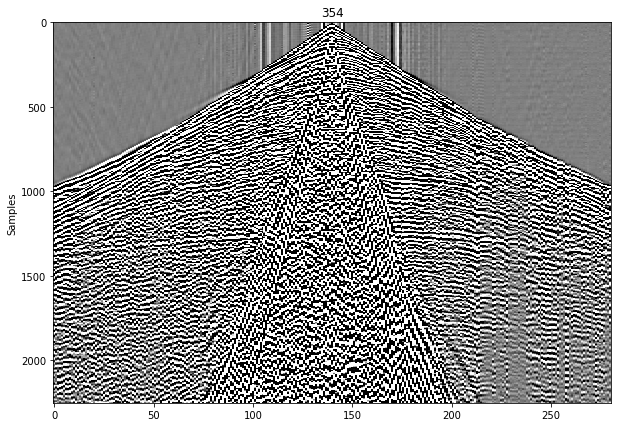

In [36]:
batch = (Dataset(index_segy, SeismicBatch).next_batch(1)
         .load(components='raw', sort_by='TRACE_SEQUENCE_FILE'))

batch.show_traces('raw', batch.indices[0], figsize=(10, 7),
                  vmin=-cv, vmax=cv, cmap='gray')

## Indexing of SPS files

Let's create an index of field records from R, S and X files.

In [47]:
dfx = pd.read_csv('/notebooks/egor/2D_Valyton/sps/ALL_VALUNT0910_X37.csv')
dfr = pd.read_csv('/notebooks/egor/2D_Valyton/sps/ALL_VALUNT0910_R_utm.csv')
dfs = pd.read_csv('/notebooks/egor/2D_Valyton/sps/ALL_VALUNT0910_S_utm.csv')

# index_sps = FieldIndex(dfx=dfx, dfr=dfr, dfs=dfs)
# index_sps.head()

Merging ```index_segy``` and ```index_sps``` we will match traces from SEGY files with its metadata from SPS files:

In [32]:
index_segy.merge(index_sps).head()

,file_id,TraceNumber,TRACE_SEQUENCE_FILE,sline,sid,rline,rid,point_index,sht_depth,uphole,x_s,y_s,z_s,x_r,y_r,z_r,offset
,raw,,raw,,,,,,,,,,,,,,
FieldRecord,,,,,,,,,,,,,,,,,
354,/notebooks/egor/2D_Valyton/prof_37/segy/000003...,1,3,S37,3591,R37,219,1,18.0,14.0,338886.78,7033413.0,71.5,338560.00,7029929.5,76.0,1749.396855
354,/notebooks/egor/2D_Valyton/prof_37/segy/000003...,2,4,S37,3591,R37,220,1,18.0,14.0,338886.78,7033413.0,71.5,338562.40,7029954.5,76.1,1736.839416
354,/notebooks/egor/2D_Valyton/prof_37/segy/000003...,3,5,S37,3591,R37,221,1,18.0,14.0,338886.78,7033413.0,71.5,338564.70,7029979.5,76.2,1724.286648
354,/notebooks/egor/2D_Valyton/prof_37/segy/000003...,4,6,S37,3591,R37,222,1,18.0,14.0,338886.78,7033413.0,71.5,338567.00,7030004.5,76.8,1711.733880
354,/notebooks/egor/2D_Valyton/prof_37/segy/000003...,5,7,S37,3591,R37,223,1,18.0,14.0,338886.78,7033413.0,71.5,338569.38,7030029.0,77.4,1699.426283


Now traces can be loaded and sorted by offset:

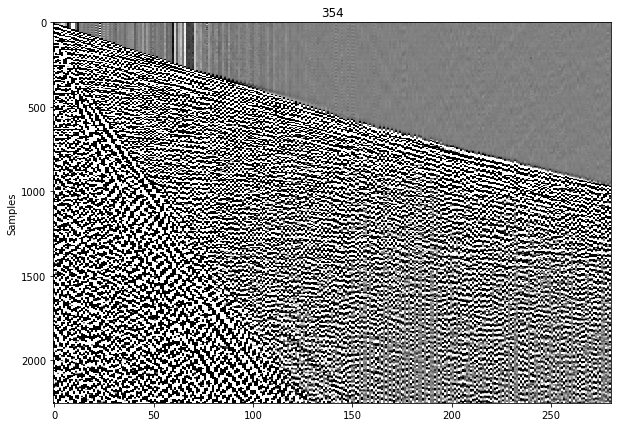

In [34]:
batch = (Dataset(index_segy, SeismicBatch).next_batch(1)
         .load(components='raw', sort_by='offset'))

batch.show_traces('raw', batch.indices[0], figsize=(10, 7),
                  vmin=-cv, vmax=cv, cmap='gray')

## Indexing of grid bins

```BinsIndex``` processes SPS files and finds optimal grid layout for given bins size:

In [76]:
dfs = pd.read_csv("/notebooks/egor/Xfield/Xfield_S.csv")
dfr = pd.read_csv("/notebooks/egor/Xfield/Xfield_R.csv")
dfx = pd.read_csv("/notebooks/egor/Xfield/Xfield_X.csv")

bin_size = 1000

index_bin = BinsIndex(dfr=dfr, dfs=dfs, dfx=dfx, bin_size=(bin_size, bin_size), iters=10)
index_bin.head()

The heatmap shows a distribution of traces within bins:

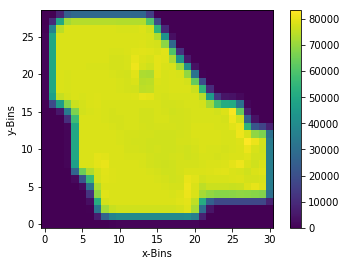

In [74]:
index_bin.show_heatmap()

```BinsIndex```, if nessessary, can be converted to any other index type. e.g. ```TraceIndex```:

In [75]:
TraceIndex(index_bin).head()

,bin_id,FieldRecord,sline,sid,rline,rid,TraceNumber,x_s,y_s,z_s,x_r,y_r,z_r,x_cdp,y_cdp,az,offset
,,,,,,,,,,,,,,,,,
0,25/5,228691Z,S2105,5139,R5103,2049,1,493989.9,6608026.0,38.7,491215.7,6606201.5,41.4,492602.8,6607113.75,-2.559846,1660.194709
1,25/5,228671Z,S2105,5140,R5103,2049,1,493989.9,6608076.0,38.6,491215.7,6606201.5,41.4,492602.8,6607138.75,-2.547369,1674.062117
2,25/5,228651Z,S2105,5141,R5103,2049,1,493989.9,6608126.0,38.6,491215.7,6606201.5,41.4,492602.8,6607163.75,-2.535098,1688.185852
3,25/5,228631Z,S2105,5142,R5103,2049,1,493989.9,6608175.5,38.6,491215.7,6606201.5,41.4,492602.8,6607188.50,-2.523153,1702.414582
4,25/5,228611Z,S2105,5143,R5103,2049,1,493989.9,6608226.0,38.7,491215.7,6606201.5,41.4,492602.8,6607213.75,-2.511172,1717.176890


Enjoy!